# Image Processing 04

```
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.color import label2rgb
from skimage.filters import try_all_threshold, threshold_otsu, threshold_local, sobel, gaussian
from skimage import exposure
from skimage.transform import rotate, resize, rescale
from skimage import morphology
from skimage.restoration import inpaint, denoise_tv_chambolle, denoise_bilateral
from skimage.util import random_noise
from skimage.segmentation import slic
from skimage import measure
from skimage.io import imread
from skimage.feature import canny, corner_harris, corner_peaks
```

In [119]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage import measure
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray, rgba2rgb
from skimage.feature import canny, corner_harris, corner_peaks


In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, original_title, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title(original_title)
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [37]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1], contour[:,0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

In [148]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

## Superpixels and segmentation

* In this subunit, we'll cover more about image segmentation: one of the most fundamental and studied topics in image processing. 
* The goal of **segmentation** is to partition images into regions, or segments, to simplify and/or change the representation into something more meaningful and easier to analyze.
* For example, **before a tumor is analyzed** in a computed tomography, **it has to be detected and somehow isolated from the rest of the image.**
    * Or, **before recognizing a face**, it has to also be **picked out from its background.**
* Previously we learned about **Thresholding**, which is the **simplest method of segmentation**, separating foreground from background (kind of... agree to disagree).

#### Image representation
* Consider how we represent images; they are represented as a grid of pixels.
* The issue is that they're not a completely natural representation of an image.
* If you were to isolate a single pixel from an image, would you be able to tell that the pixel came from a particular image and that this single pixel holds a logical meaning. 
* **A single pixel, by itself, is not a natural representation.**

## Superpixels
* **We can explore more logical meanings in an image that's formed by bigger regions or grouped pixels** (than single pixels on their own). These are known as **superpixels.**
* A **superpixel** is a **group of connected pixels with similar colors or gray levels.**
    * These carry more meaning than their simple pixel grid counterparts.
* **Superpixel segmentation** is dividing an image into superpixels.

#### Benefits of superpixels
* **Superpixel segmentation** is dividing an image into superpixels.
* **Superpixel segmentation** has been applied to many computer vision tasks, like **visual tracking** and **image classification**.
* Some advantages for using superpixels are:
    * More meaningful regions
    * Computational efficiency
        * Reduce an image from thousands of pixels down to some regions for subsequent algorithms, so you have computational efficiency.
        
## Segmentation
* Two types of segmentation are:
    * **1) Supervised:** where some prior knowledge is used to guide the algorithm. 
        * Example: the kind of thresholding in which we specify the threshold value ourselves.
    * **2) Unsupervised:** where no prior knowledge is required. 
        * These algorithms try to subdivide images into meaningful regions automatically.
        * The user may still be able to tweak certain settings to obtain the desired output. 
        * Example: Otsu thresholding

### Unsupervised Segmentation

#### Simple Linear Iterative Clustering (SLIC)
* An unsupervised segmentation technique based on superpixels
* Segments the image using **K-Means clustering**.
* It takes in all the pixel values of the image and tries to separate them into a predefined number of sub-regions.
* We can find the algorithm in the `segmentation` module as the `slic` function
* This method returns the segmented regions, also known as **labels**.
* **labels = segmented regions**
* Below we use this function with default parameters to obtain the segments.

```
# Import the modules
from skimage.segmentation import slic
from skimage.color import label2rgb

# Obtain the segments
segments = slic(image)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, image, kind='avg')

show_image(image)
show_image(segmentation_image, 'Segmented image')
```
* We use the `label2rgb` method from the color module to return an image where the segments obtained from the slic method will be highlighted, either with random colors, or with the average color of the superpixel segment. In this example, we used the average color by setting `kind ='avg'`.
* **Note that default `n_segments = 100`**
***

* If we want more segments, say 300, we can specify this with an optional parameter `n_segments` with the `slic` call.

```
# Obtain the segments
segments = slic(image, n_segment= 300)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, image, kind='avg')

show_image(image)
show_image(segmented_image, 'Segmented image')
```

[skimage.color documentation](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.label2rgb)
* Note new FutureWarnings: **must specify `slic(start_label=1)` and `labelrgb(bg_label=0)`**
* **Use either:**
    * **`show_image(segmented_image/255)`**
    * **OR**
    * **`show_image(np.array(segmented_image, np.int32))`**
* See this [StackOverflow](https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa) for helpful troubleshooting with latest updates

```
segments = slic(coffee_image, start_label=1)
segmented_image = label2rgb(segments, coffee_image, kind='avg', bg_label=0)
show_image(coffee_image, 'Original')
show_image(segmented_image/255, 'Segmented image')
```

### Coffee image segmentation

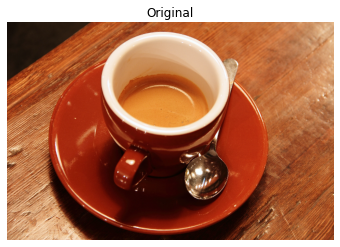

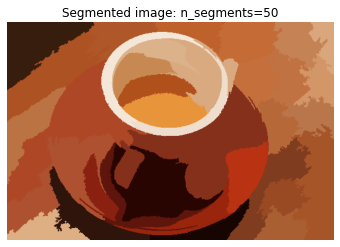

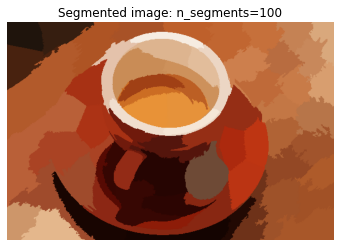

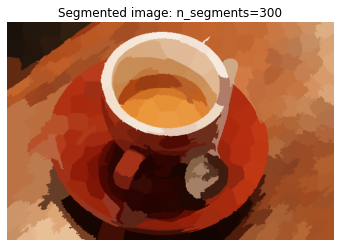

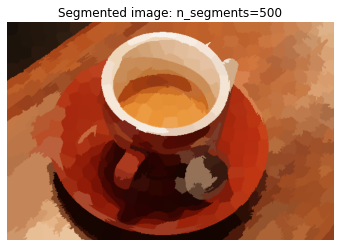

In [11]:
coffee_image = data.coffee()
show_image(coffee_image, 'Original')
segment_list = [50, 100, 300, 500]
# from skimage.segmentation import slic
# from skimage.color import label2rgb

for segment in segment_list:
    segments = slic(coffee_image, n_segments = segment, start_label=1)
    segmented_image = label2rgb(segments, coffee_image, kind = 'avg', bg_label=0)
    show_image(segmented_image/255, 'Segmented image: n_segments='+str(segment))

## Cat image segmentation

In [12]:
cat_image = data.cat()

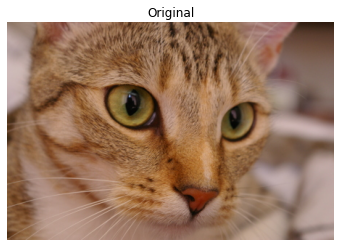

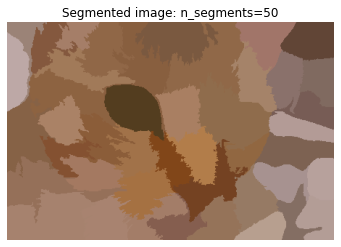

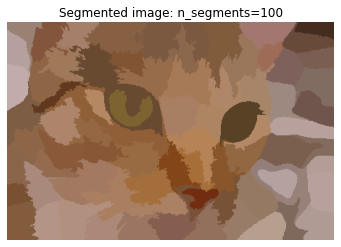

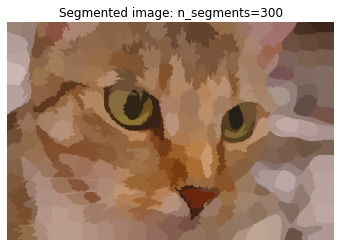

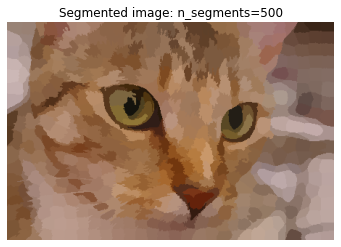

In [13]:
show_image(cat_image, 'Original')
for segment in segment_list:
    segments = slic(cat_image, n_segments = segment, start_label=1)
    segmented_image = label2rgb(segments, cat_image, kind = 'avg', bg_label=0)
    show_image(segmented_image/255, 'Segmented image: n_segments='+str(segment))

## Astronaut image segmentation

In [15]:
astro_image = data.astronaut()

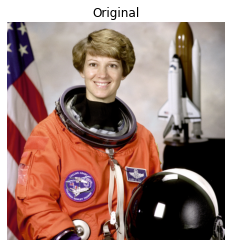

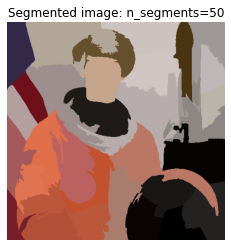

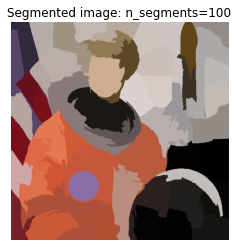

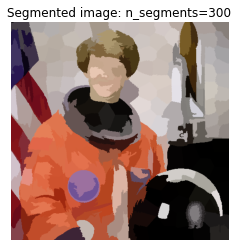

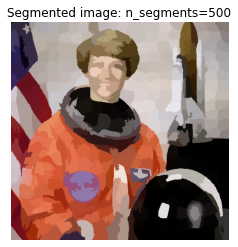

In [16]:
show_image(astro_image, 'Original')
for segment in segment_list:
    segments = slic(astro_image, n_segments = segment, start_label=1)
    segmented_image = label2rgb(segments, astro_image, kind = 'avg', bg_label=0)
    show_image(segmented_image/255, 'Segmented image: n_segments='+str(segment))

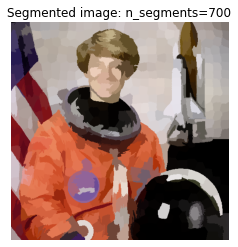

In [18]:
segments = slic(astro_image, n_segments = 700, start_label=1)
segmented_image = label2rgb(segments, astro_image, kind = 'avg', bg_label=0)
show_image(segmented_image/255, 'Segmented image: n_segments=700')

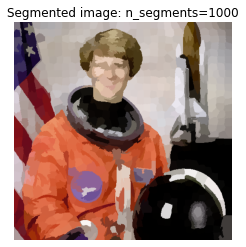

In [19]:
segments = slic(astro_image, n_segments = 1000, start_label=1)
segmented_image = label2rgb(segments, astro_image, kind = 'avg', bg_label=0)
show_image(segmented_image/255, 'Segmented image: n_segments=1000')

### Resolution: number of pixels
* Let's calculate the total number of pixels in an image.
* **The total amount of pixels is its resolution, given by *Height x Width*.**
* Use `.shape` from NumPy which is preloaded as `np`, in the console to check the width and height of the image.

In [23]:
height, width, channels = astro_image.shape

In [25]:
resolution = height * width
print('The resolution of the astronaut image is:', resolution)

The resolution of the astronaut image is: 262144


#### Superpixel segmentation
* In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model. By segmenting the superpixels, you will reduce the image from 265 x 191 = 50,615 pixels down to 400 regions.

```
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")
```

## Finding Contours
* In this subunit, we will learn how to find the contours of the objects in an image
* A **contour** is a closed shape of points or line segments, representing the boundaries of these object.
* Once we find the contours, we can do things like identifying the total points in domino tokens or the dots on dice. 
* With contours we can:
    * **Measure size**
    * **Classify shapes**
    * **Determine the number of objects**
* **The input to a contour-finding function should be a binary image.**
* We can obtain a binary image by applying **thresholding** or by using **edge detection**.
* In such a binary image, **the objects we wish to detect should be white**, while the background remains black.

### Finding contours with scikit-image
#### Preparing the image
* First the image needs to go through some pre-processing steps:
    * 1) Transform the image to 2D grayscale (to later apply thresholding)
    * 2) Binarize the image (in order to use `find_contours` function
    * 3) Use the **`find_contours()`** function that is included in the `measure` module of scikit-image.
        * This function finds the contour lines or join points (pixels) of equal elevation (or, brightness) in a 2D array above a given level value
        * Pass in the thresholded image as the first parameter and a constant level value as the second parameter (in the example below we use 0.8)
        * **The function returns a list with all contours of the image.**

```
# (1) Make the image grayscale
image = color.rgb2gray(image)

# (2) Obtain the thresh value
thresh = threshold_otsu(image)

# Apply thresholding
thresholded_image = image > thresh

# (3) Import the measure module
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(thresholded_image, 0.8)
```

* The level value varies between 0 and 1:
    * The closer to 1, the more sensitive the method is to detecting contours (so more complex contours will be detected).
    * We have to find the value that best detects the contours we care for

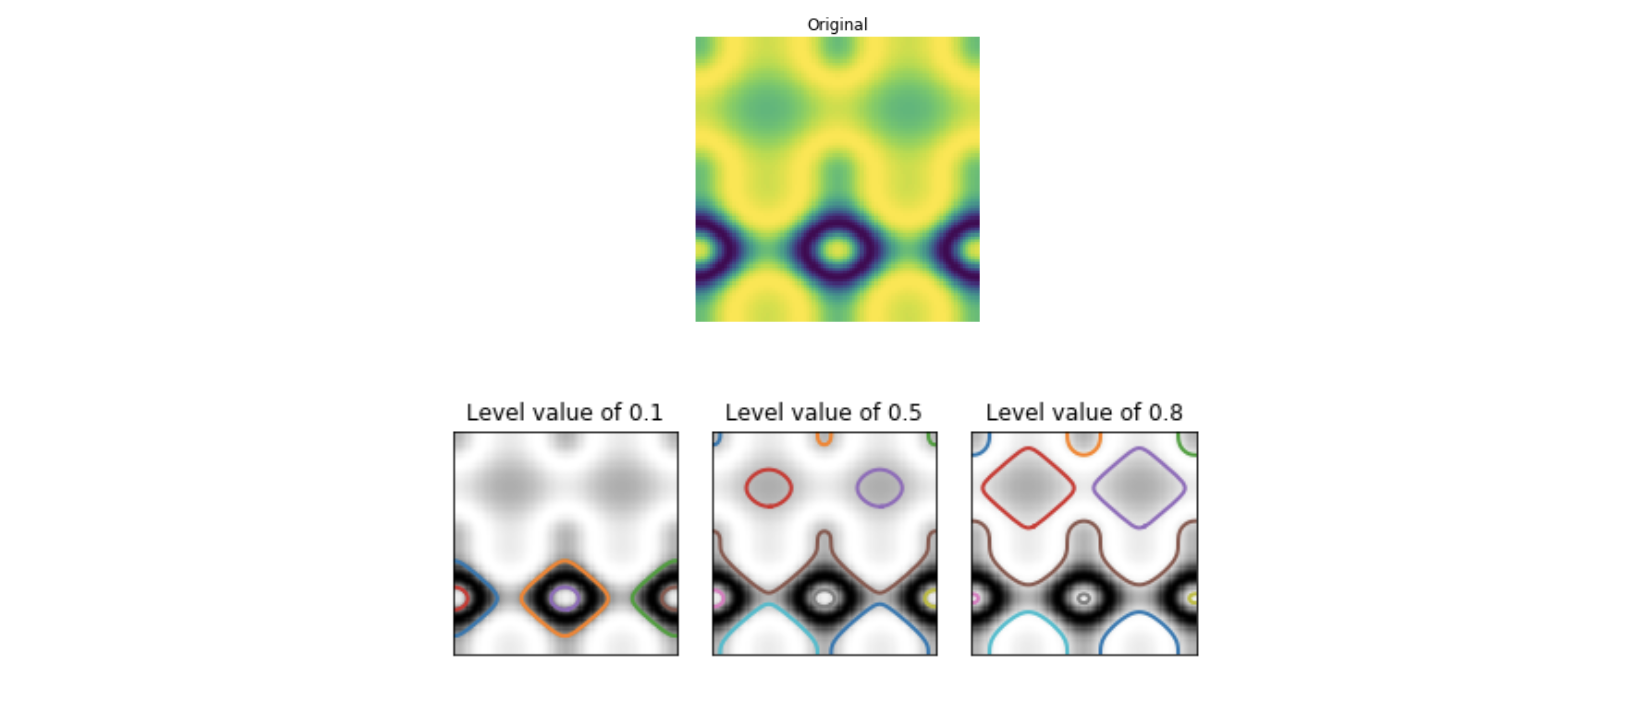

In [26]:
display.Image("pics/constant_level_value.png")

#### Summary: the steps to spotting contours
* 1) If it's colored, transform it to grayscale
* 2) Obtain the optimal thresh value
* 3) Apply thresholding and obtain the binary image
* 4) Once we have our binary image, we can call the `find_contours()` function and set a constant level value.


```
from skimage import measure
from skimage.filters import threshold_otsu

# Make the image grayscale
image = color.rgb2gray(image)
# Obtain the optimal thresh value of the image
thresh = threshold_otsu(image)

# Apply thresholding and obtain binary image
thresholded_image = image > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(thresholded_image, 0.8)
```
**Resulting in the image with contours detected**
* After executing these steps, we obtain a list of contours
* Each contour is an ndarray of shape (n, 2), consisting og n row and column coordinates along the contour

#### A contour's shape
* Contours: list of (n,2) - ndarrays
* In this way, a **contour** is like **an outline formed by multiple points joined together.**
* The bigger the contour, the more points joined together and the wider the perimeter formed

```
for contour in contours:
    print(contour.shape)
```

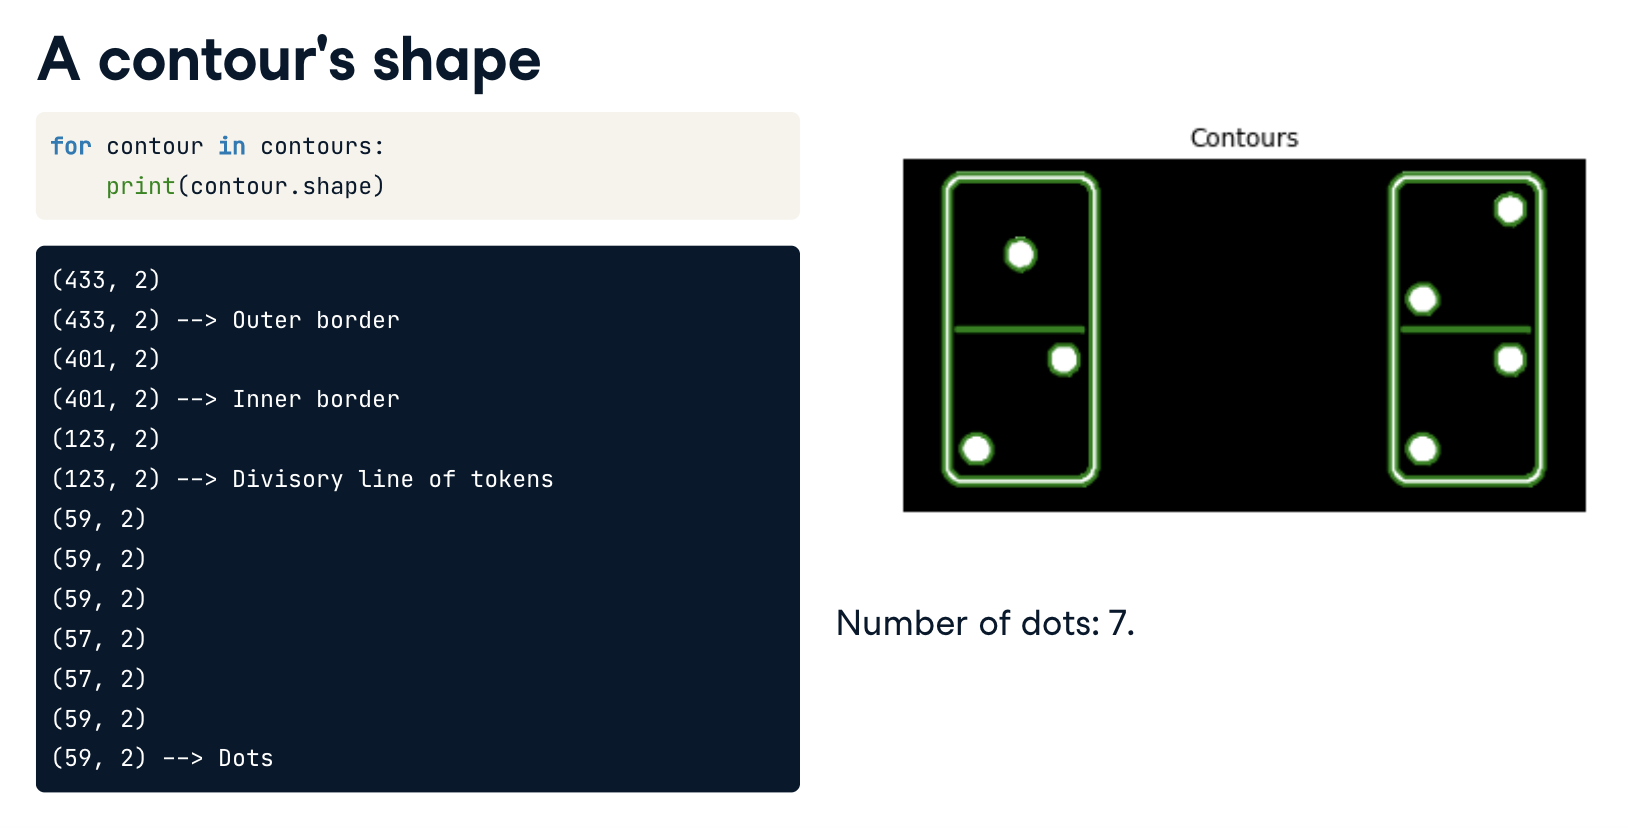

In [27]:
display.Image("pics/contour_shape.png")

* The first two have a shape of 433 (the longest/biggest), so we can deduct they are the outer border contour of the dominos because they are the longest. Meaning, these are the biggest objects, judging by their shapes
* The ones that have a shape of 401 belong to the inner border of the (2) domino tokens
* The contours of length 123 are the dividing lines in the middle of each domino.
* And then we see the majority of the contours have a shape of 59: these are the domino dots

#### Contouring shapes

In this exercise we'll find the contour of a horse.

For that we will make use of a **binarized** image provided by scikit-image in its `data` module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!

`show_image_contour(image, contours)` is a preloaded function that displays the image with all contours found using Matplotlib.

Remember you can use the `find_contours()` function from the measure module, by passing the thresholded image and a constant value.

[Helpful extra material for function definitions](https://goodboychan.github.io/python/datacamp/vision/2020/08/02/02-Image-restoration-Noise-Segmentation-and-Contours.html)

**Remember:**

```
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:,1], contour[:,0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
```

In [31]:
horse_image = data.horse()
thresh = 0.5
inverted_horse = horse_image <= thresh

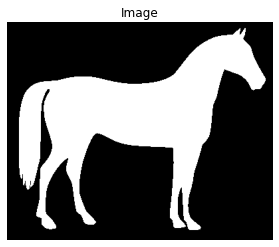

In [32]:
show_image(inverted_horse)

In [36]:
contours = measure.find_contours(inverted_horse, 0.8)
for contour in contours:
    print(contour.shape)

(2645, 2)
(15, 2)


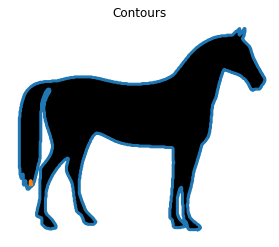

In [38]:
show_image_contour(inverted_horse, contours)

<ipython-input-53-bd28b375a072>:8: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  dice_image = rgb2gray(image_dice)


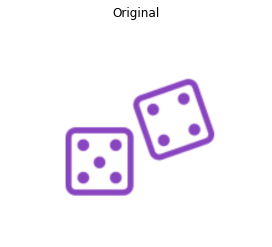

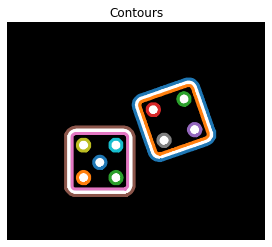

In [53]:
# from skimage.io import imread
# from skimage.filters import threshold_otsu
# from skimage.color import rgb2gray

image_dice = imread('pics/DC_dice.png')

# Make the image grayscale
dice_image = rgb2gray(image_dice)

# Obtain the optimal thresh value
thresh = threshold_otsu(dice_image)

# Apply thresholding
binary = dice_image > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image(image_dice, "Original")
show_image_contour(dice_image, contours)

### Count the dots in a dice's image
Now we have found the contours, we can extract information from it.

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

The contours found in the previous exercise are preloaded as `contours`.

Create a list with all contour's shapes as `shape_contours`. You can see all the contours shapes by calling `shape_contours` in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

`show_image_contour(image, contours)` is a preloaded function that displays the image with all contours found using Matplotlib.

```
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))
```

In [56]:
for contour in contours:
    print(contour.shape)

(577, 2)
(489, 2)
(87, 2)
(83, 2)
(87, 2)
(485, 2)
(397, 2)
(85, 2)
(83, 2)
(81, 2)
(85, 2)
(85, 2)
(85, 2)


Dice's dots number: 9. 


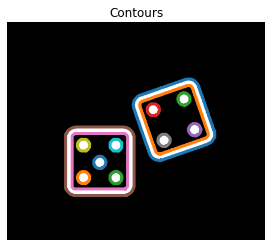

In [57]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 90

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

# $\star$ Chapter 4: Advanced Operations, Detecting Faces and Features

After completing this chapter, you will have a deeper knowledge of image processing as you will be able to **detect edges, corners, and even faces!** You will learn how to detect not just front faces but also face profiles, cat, or dogs. You will apply your skills to more complex **real-world applications.** Learn to master several widely used image processing techniques with very few lines of code!

## Finding the edges with Canny
* Learn how to detect edges, corners, and people's faces using built-in functions that do so really fast and with just a few lines of code. 

#### Edge Detection
* **Edge detection** is extensively used when we want to divide the image into areas corresponding to different objects
* Most of the shape information of an image is enclosed in edges
* **Representing an image by its edges has the advantage that the amount of data is reduced significantly, while still retaining most of the (relevant) image information, like the shapes.**
* In a previous chapter, we saw how to detect edges using the `Sobel` filtering technique.
* **Canny edge detection:** one of the most used edge detection techniques
    * **This (`Canny`) is widely considered to be the standard edge detection method in image processing and produces higher accuracy detecting edges and less execution time as compared with the `Sobel` algorithm.**
* The detector can be applied with the `canny` function from the `feature` module of `skimage`.
* This function requires the image to be a 2-dimensional array, meaning, a **grayscale image.**
    * So, in this example, we convert the image from RGB-3 to grayscale (below)
* Then, we apply the canny detector on the coin's image and obtain the resulting image.

```
from skimage.feature import canny

# Convert image to grayscale
coins = color.rgb2gray(coins)

# Apply Canny detector
canny_edges = canny(coins)

# Show resulted image with edges
show_image(canny_edges, "Edges with Canny")
```

In [59]:
coins_image = data.coins()

<ipython-input-63-1f30e5114ef9>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  coins_gray = rgb2gray(coins_image)


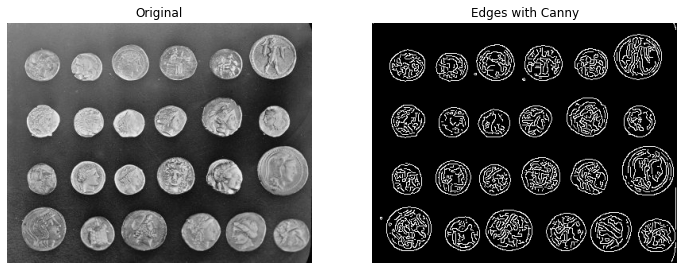

In [63]:
coins_gray = rgb2gray(coins_image)
canny_edges_coins = canny(coins_gray)
plot_comparison(coins_image, 'Original', canny_edges_coins, 'Edges with Canny')

* Above, we see how the edges are highlighted with thick, white lines and that **some details are more pronounced than the rest of the image.**
* We can also spot the **boundaries** and **shapes** of the coins, by knowing that for each enclosed circle or ellipse, there is a coin.

## Canny edge detector
* 1) The first step of this algorithm is to **apply a gaussian filter** in order to remove noise in the image; the same gaussian filter we have seen previously in the course with the `gaussian` function from the `filters` module.
    * In the `canny` function, **you can optionally set the intensity of this gaussian filter** to be applied in the image, by using the `sigma` attribute.
    * Default `sigma` is `1`.
    * The **lower the value of `sigma`**, the less gaussian filter effect is applied to the images, and so it **will spot more edges**.
    * On the other hand, if you set a **higher value for `sigma`**, more noise will be removed and the result is going to be a **less edgy image**.

```
from skimage.feature import canny

# Apply Canny detector with a sigma of 0.5
canny_edges_0_5 = canny(coins, sigma= 0.5)

# Show resulted images with edges
show_image(canny_edges, "Sigma of 1")
show_image(canny_edges_0_5, "Sigma of 0.5")
```

In [69]:
sigma_list = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]

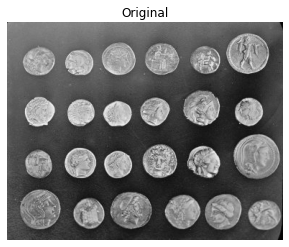

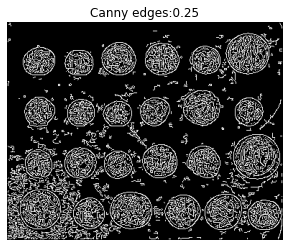

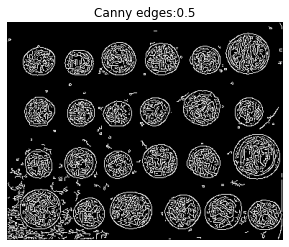

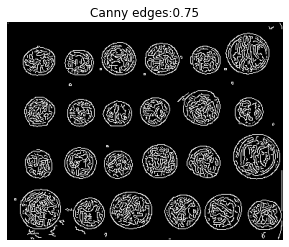

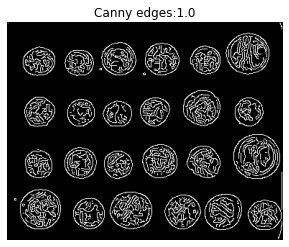

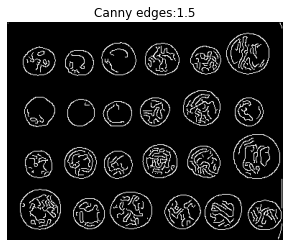

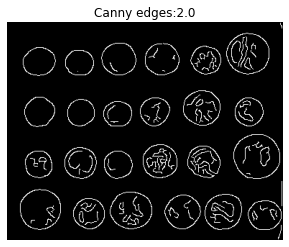

In [70]:
show_image(coins_image, "Original")
for sigma in sigma_list:
    canny_edges = canny(coins_image, sigma = sigma)
    show_image(canny_edges, "Canny edges:"+ str(sigma))

### Edges
* In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.

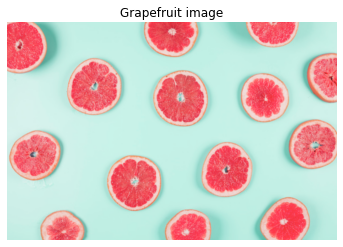

In [73]:
grapefruit_image = imread('pics/grapefruits.png')
show_image(grapefruit_image, "Grapefruit image")

In [ ]:
# Note: deprecated code, see updated code below to avoid FutureWarning
#show_image(rgb2gray(grapefruit_image))

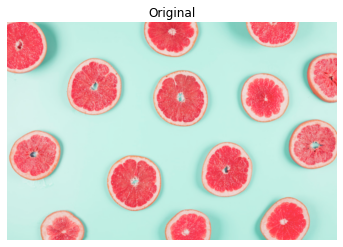

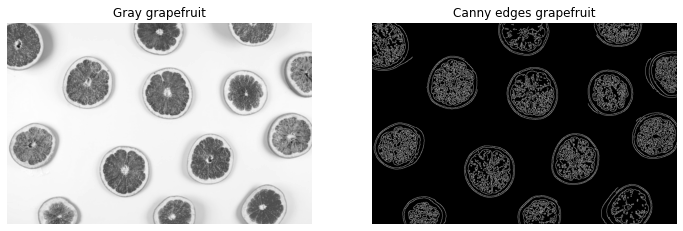

In [98]:
# from skimage.feature import canny

grapefruit_gray = rgb2gray(rgba2rgb(grapefruit_image))

canny_edges = canny(grapefruit_gray)

#show_image(canny_edges, "Edges with Canny")
show_image(grapefruit_image, "Original")
plot_comparison(grapefruit_gray, "Gray grapefruit", canny_edges, "Canny edges grapefruit")

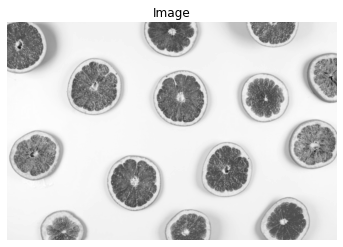

In [95]:
show_image(grapefruit_gray)

### Less edgy
Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

In this exercise, you'll experiment with `sigma` values of the `canny()` function.

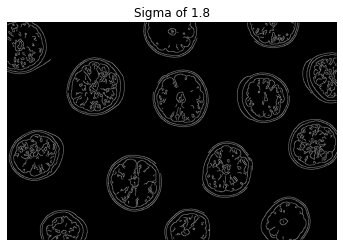

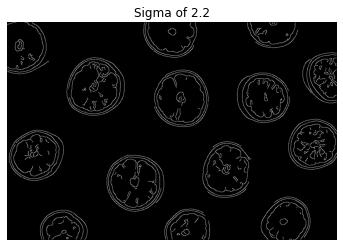

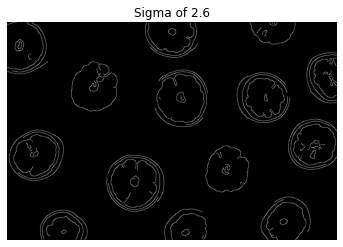

In [101]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit_gray, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit_gray, sigma=2.2)

# Apply canny edge detector with a sigma of 2.6
edges_2_6 = canny(grapefruit_gray, sigma=2.6)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")
show_image(edges_2_6, "Sigma of 2.6")

## Right around the corner
* In this subunit, we'll learn to detect another feature of an image: **the corners**, as well as why this is useful in image processing.

### Corner Detection
* **Corner detection** is an approach used to extract certain types of features and infer the contents of an image. 
    * It is frequently used in:
        * **Motion detection**
        * **Image registration**
        * **Video tracking**
        * **Panorama stitching**
        * **3D modeling**
        * **Object recognition**
* We saw in the previous subunit how to detect edges with the Canny edge detector, and before that, with the Sobel edge detector in chapter 2.
* **Edges are a type of feature in images.**
* **Features** are the points of interest which provide **rich content information**.
* **Points of interest** are points in the image which are invariant to:
    * Rotation
    * Translation
    * Intensity
    * Scale changes
* Points of interest are **robust** and **reliable**.
* Different interest points include corners and edges.
* **Corner detection is detecting (one type of) interest points in an image.**
* A **corner** can be defined as the interestion of two edges       

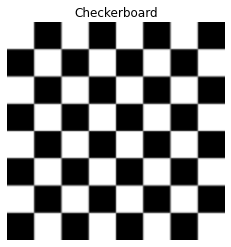

In [102]:
checkerboard = data.checkerboard()
show_image(checkerboard, 'Checkerboard')

A **corner** can be defined as the interestion of two edges. Intuitively, it can also be a junction of contours.

The checkerboard image above has some very obvious corners.

#### Matching corners
* By detecting corners as interest points, we can match objects from different perspectives, like in the image below, where we detect the corners of the original image on the left and then match them in the downscaled image on the right. 

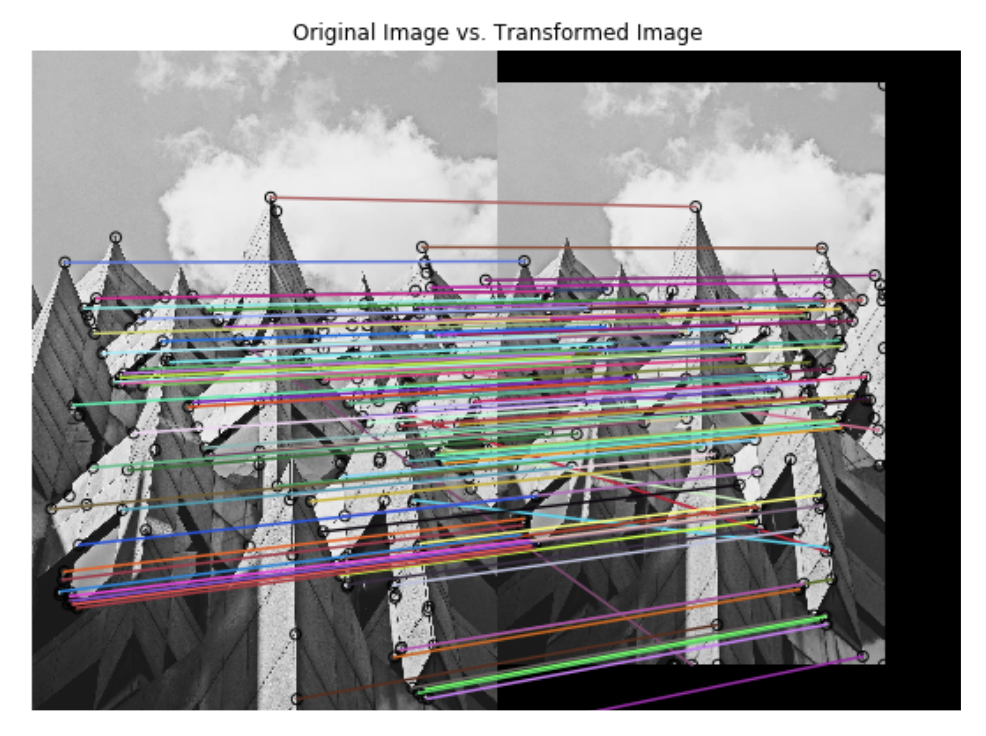

In [104]:
display.Image("pics/matching_corners.png")

Below is another example of corner matching, this time, in a rotated image:

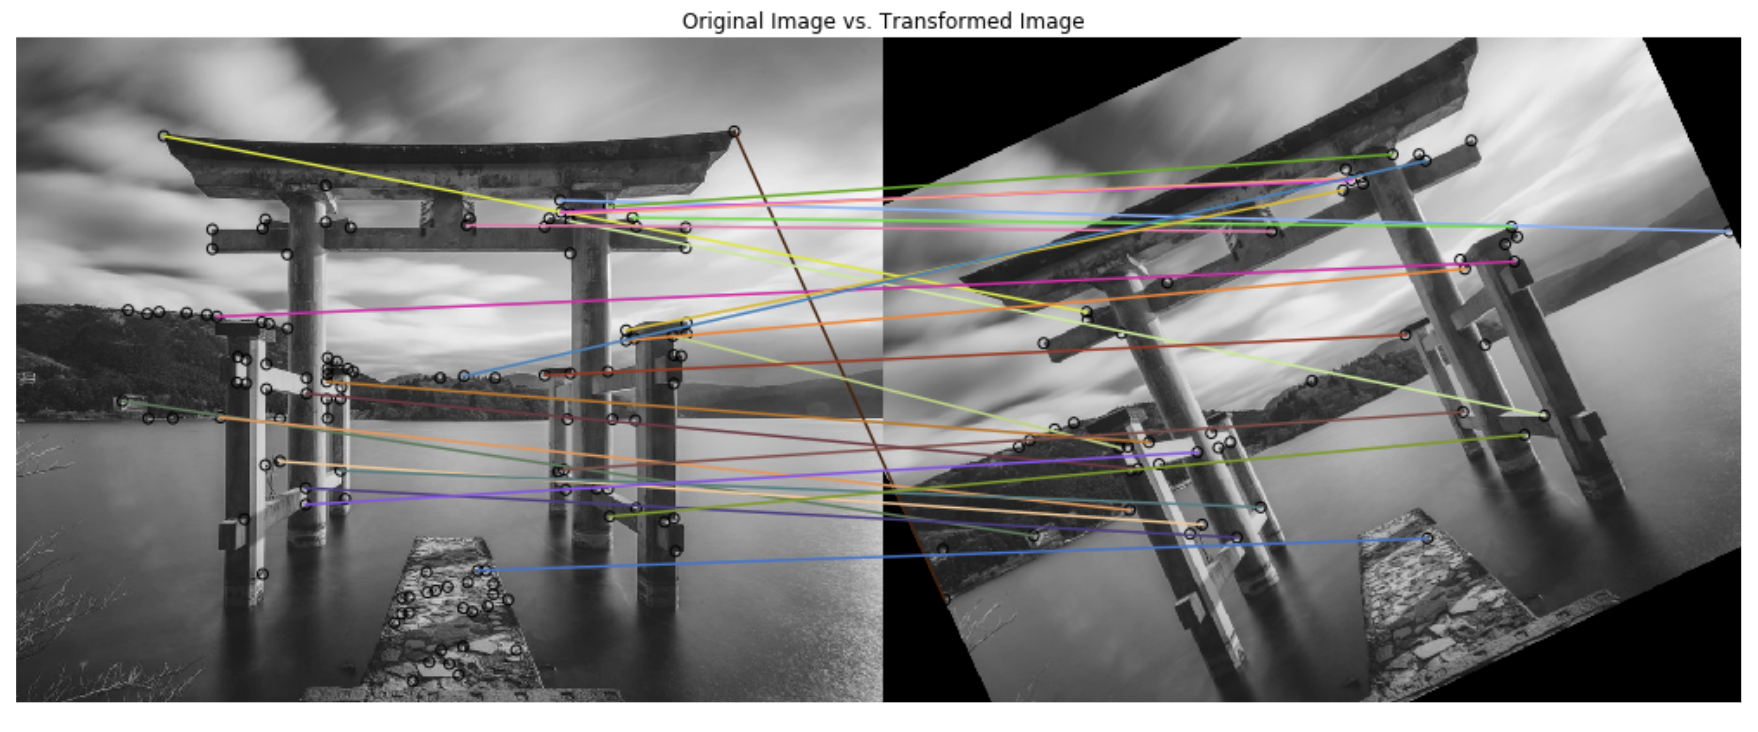

In [105]:
display.Image("pics/matching_corners2.png")

We can see how the relevant points (corners) are matched in the images above.

## Harris Corner Detector
* **Harris Corner Detector** is a corner detection operator that is widely used in computer vision algorithms.
* Remember the definition of `show_image_with_corners`:

```
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
```
* We'll use the following image of a Japanese gate to work with the Harris detector:

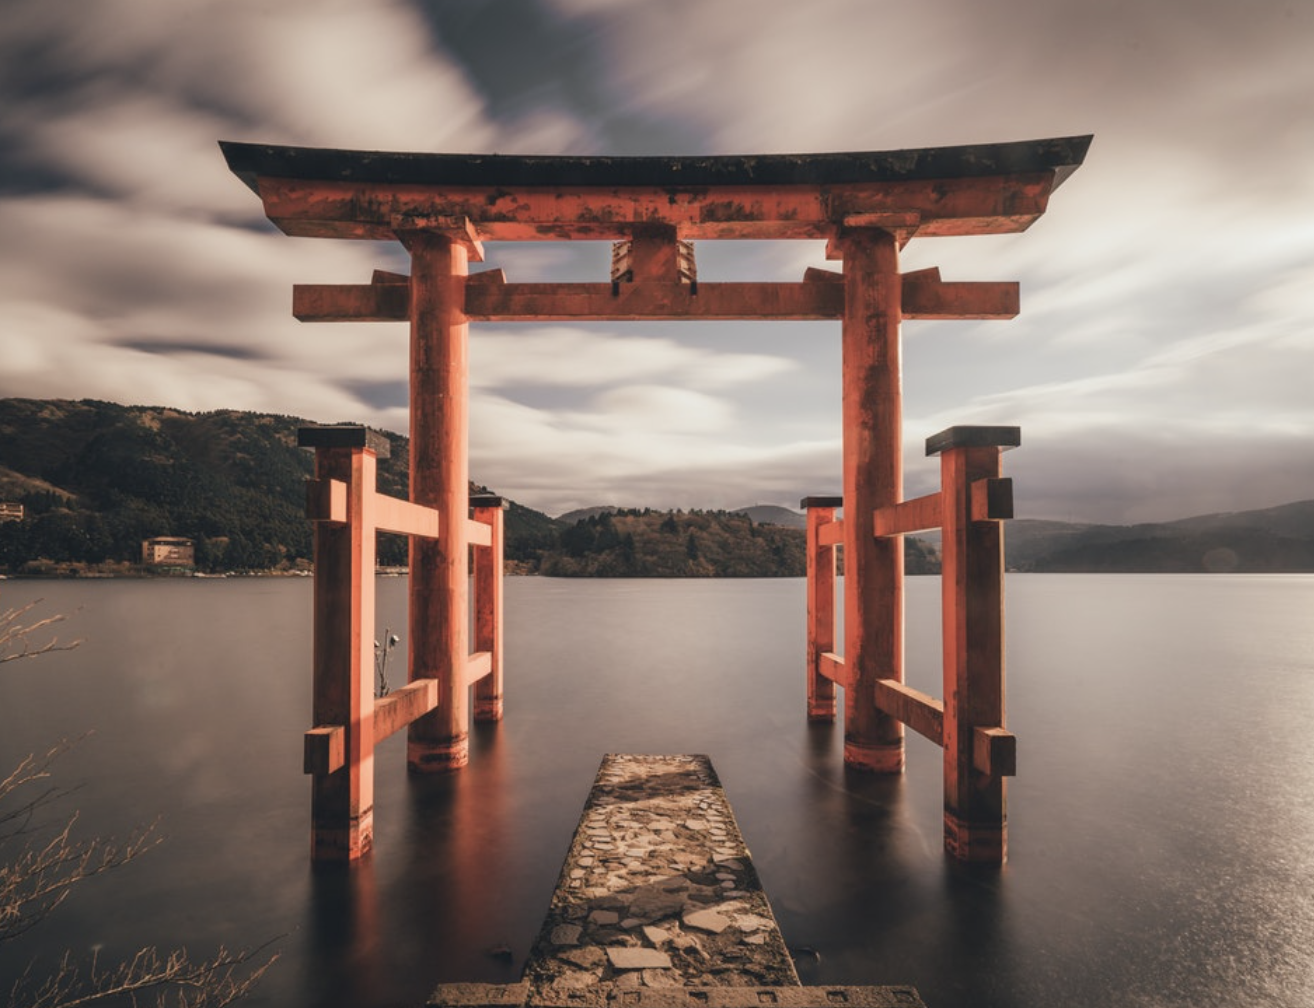

In [107]:
display.Image("pics/japanese_gate.png")

* The `corner_harris` function from the `feature` module of `skimage`.
* This function requires grayscale images, so we first need to convert the image frm rgb to gray.
* The `corner_harris` function gives us the Harris measure response image, meaning, the resulting image showing only the possible corners that were measured.
* When we show the resulting image, we see that only some black lines are shown.

```
from skimage.feature import corner_harris

# Convert image to grayscale
image = rgb2gray(image)

# Apply the Harris corner detector on the image
measure_image = corner_harris(image)

# Show the Harris response image
show_image(measure_image)
```

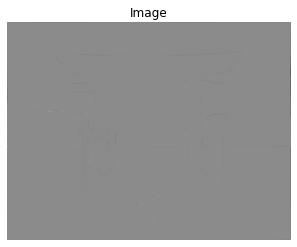

In [116]:
# from skimage.feature import corner_harris

japanese_gate = imread('pics/japanese_gate.png')
gate = rgb2gray(rgba2rgb(japanese_gate))
measure_gate = corner_harris(gate)
show_image(measure_gate)

* **Note:** You may need to look closely and/or zoom in on the screen to see the black edgelines above.

* The black lines shown above are the approximated points where the **corners candidates** are.
* To find the corners in the measure response image, we can use the **`corner_peaks`** function, which will return the coordinates of the peaks of the possible corners. Optionally, w can make sure these peak corners are separated by a minimum distance, in pixels, using the `min_distance` parameter.
* Below we set the minimum distance between corners to 5 pixels (**update** DC used `min_distance =5`, in the example below, we used `min_distance = 39`, which detects the same number of corners (122) as DC's example), however this does not yield very accurate results, so we continued to play with the `min_distance` value.

```
# Finds the coordinates of the corners
coords = corner_peaks(corner_harris(image), min_distance=5)

print("A total of", len(coords), "corners were detected.")
```

In [137]:
coords = corner_peaks(corner_harris(gate), min_distance=39)
print("A total of", len(coords), "corners were detected.")

A total of 122 corners were detected.


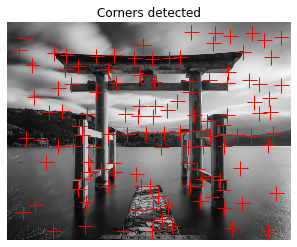

In [138]:
# Show image with marks in detected corners
show_image_with_corners(gate, coords)

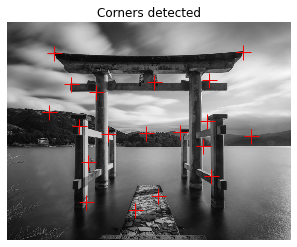

In [147]:
coords = corner_peaks(corner_harris(gate), min_distance=100)
show_image_with_corners(gate, coords)

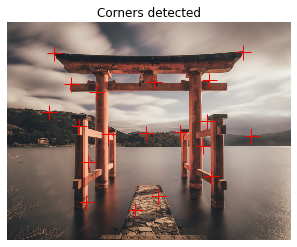

In [150]:
coords = corner_peaks(corner_harris(gate), min_distance=100)
show_image_with_corners(japanese_gate, coords)

**Note that while the image passed to the `corner_harris` and `corner_peaks` functions must be converted to grayscale to obtain the coordinates of the corners, these coordinates can then be laid over either the *original*, colored image, or the grayscaled version.**

#### Checkerboard example

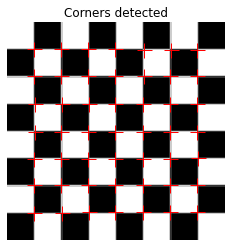

In [136]:
coords_checker = corner_peaks(corner_harris(checkerboard), min_distance=15)
show_image_with_corners(checkerboard, coords_checker)

In [151]:
print("A total of", len(coords_checker), "corners were detected in the checkerboard image.")

A total of 49 corners were detected in the checkerboard image.


#### Building image

In [153]:
building = imread('pics/building.png')

```
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)
```

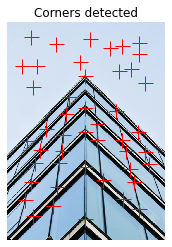

In [161]:
# from skimage.feature import corner_harris, corner_peaks
building_gray = rgb2gray(rgba2rgb(building))
coords_building = corner_peaks(corner_harris(building_gray), min_distance=50)
show_image_with_corners(building, coords_building)